In [1]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt


In [2]:
net = model_zoo.ssd_512_resnet50_v1_voc(pretrained=True)
net


/home/xuelianliu/.local/lib/python3.6/site-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


Model file is not found. Downloading.


100%|██████████| 132723/132723 [00:12<00:00, 10280.21KB/s]


SSD(
  (features): FeatureExpander(
  <Symbol group [ssd0_resnetv10_stage3_activation5, ssd0_resnetv10_stage4_activation2, ssd0_expand_reu0, ssd0_expand_reu1, ssd0_expand_reu2, ssd0_expand_reu3]> : 1 -> 6
  )
  (class_predictors): HybridSequential(
    (0): ConvPredictor(
      (predictor): Conv2D(1024 -> 84, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): ConvPredictor(
      (predictor): Conv2D(2048 -> 126, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (2): ConvPredictor(
      (predictor): Conv2D(512 -> 126, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (3): ConvPredictor(
      (predictor): Conv2D(512 -> 126, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (4): ConvPredictor(
      (predictor): Conv2D(256 -> 84, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (5): ConvPredictor(
      (predictor): Conv2D(256 -> 84, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (box_predictors): HybridSequenti

In [4]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/street_small.jpg?raw=true',
                          path='street_small.jpg')
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)

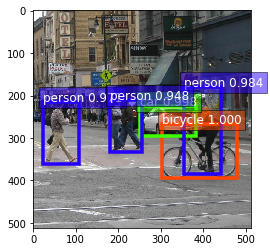

In [6]:
class_IDs, scores, bounding_boxes = net(x)
ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0], class_IDs[0], thresh=0.9, class_names=net.classes)
plt.show()